In [2]:
import os
import json
import requests
import pandas as pd
import utils.utils as utils
from tqdm import tqdm
from pymongo import MongoClient
from process.wrapper import mongodb_conn
import numpy as np
import matplotlib.pyplot as plt

dataset = {
    "Round1_T2D": {
        "tables": "./data/Dataset/Round1_T2D/tables",
        "cea":"./data/Dataset/Round1_T2D/gt/CEA_Round1_gt_WD.csv",
        "cpa":"./data/Dataset/Round1_T2D/gt/CPA_Round1_gt.csv",
        "cta": "./data/Dataset/Round1_T2D/gt/CTA_Round1_gt.csv"
    },
    "HardTableR2-2021": {
        "tables":"./data/Dataset/HardTablesR2/tables/", 
        "cea":"./data/Dataset/HardTablesR2/gt/cea.csv",
        "cpa":"./data/Dataset/HardTablesR2/gt/cpa.csv",
        "cta": "./data/Dataset/HardTablesR2/gt/cta.csv"
    },
    "HardTableR3-2021": {
        "tables":"./data/Dataset/HardTablesR3/tables/", 
        "cea":"./data/Dataset/HardTablesR3/gt/cea.csv",
        "cpa":"./data/Dataset/HardTablesR3/gt/cpa.csv",
        "cta": "./data/Dataset/HardTablesR3/gt/cta.csv"
    },
    "Round3": {
        "tables": "./data/Dataset/Round3_2019/tables/",
        "cea":"./data/Dataset/Round3_2019/gt/CEA_Round3_gt_WD.csv",
        "cpa":"./data/Dataset/Round3_2019/gt/CPA_Round3_gt.csv",
        "cta": "./data/Dataset/Round3_2019/gt/CTA_Round3_gt.csv"
    },
    "2T-2020": {
        "tables":"./data/Dataset/2T_Round4/tables/", 
        "cea":"./data/Dataset/2T_Round4/gt/cea.csv",
        "cpa": None,
        "cta": "./data/Dataset/2T_Round4/gt/cta.csv"
    },
    "Round4": {
        "tables": "./data/Dataset/Round4_2020/tables/",
        "cea":"./data/Dataset/Round4_2020/gt/cea.csv",
        "cpa":"./data/Dataset/Round4_2020/gt/cpa.csv",
        "cta": "./data/Dataset/Round4_2020/gt/cta.csv"
    }
}



id_dataset = "Round4"

In [2]:
import os
import json
import requests
import pandas as pd
import utils.utils as utils
from tqdm import tqdm
from pymongo import MongoClient
from process.wrapper import mongodb_conn
import numpy as np
import matplotlib.pyplot as plt

dataset = {
    "HardTableR2-2021": {
        "tables":"./data/Dataset/HardTablesR2/tables/", 
        "cea":"./data/Dataset/HardTablesR2/gt/cea.csv",
        "cpa":"./data/Dataset/HardTablesR2/gt/cpa.csv",
        "cta": "./data/Dataset/HardTablesR2/gt/cta.csv"
    },
    "HardTableR3-2021": {
        "tables":"./data/Dataset/HardTablesR3/tables/", 
        "cea":"./data/Dataset/HardTablesR3/gt/cea.csv",
        "cpa":"./data/Dataset/HardTablesR3/gt/cpa.csv",
        "cta": "./data/Dataset/HardTablesR3/gt/cta.csv"
    },
    "Round4": {
        "tables": "./data/Dataset/Round4_2020/tables/",
        "cea":"./data/Dataset/Round4_2020/gt/cea.csv",
        "cpa":"./data/Dataset/Round4_2020/gt/cpa.csv",
        "cta": "./data/Dataset/Round4_2020/gt/cta.csv"
    }
}


In [28]:
with open("final_scores.jsonl") as f:
    data = f.read().strip().split("\n")
buffer = []
i = 0
json.loads(data[0])
temp = []
for row in data:
    print(i, row)
    e = json.loads(row)
    temp.append(e["score"])
    if i == 9:
        buffer.append(temp)
        temp = []
    i = (i + 1) % 10
    

0 {"dataset": "2T_cell_to_gt.jsonl", "candidate_type": "10", "score": 0.8590033222591362, "mrr": 0.6920930232558139, "not_found": 8741, "total_entities": 67725}
1 {"dataset": "2T_cell_to_gt.jsonl", "candidate_type": "20", "score": 0.8997563676633444, "mrr": 0.6947360649686231, "not_found": 6337, "total_entities": 67725}
2 {"dataset": "2T_cell_to_gt.jsonl", "candidate_type": "30", "score": 0.9166334440753046, "mrr": 0.6953414544112219, "not_found": 5325, "total_entities": 67725}
3 {"dataset": "2T_cell_to_gt.jsonl", "candidate_type": "40", "score": 0.9280177187153932, "mrr": 0.695577703949797, "not_found": 4605, "total_entities": 67725}
4 {"dataset": "2T_cell_to_gt.jsonl", "candidate_type": "50", "score": 0.9346770025839793, "mrr": 0.6956810631229235, "not_found": 4191, "total_entities": 67725}
5 {"dataset": "2T_cell_to_gt.jsonl", "candidate_type": "60", "score": 0.9391066814322628, "mrr": 0.6957401255075674, "not_found": 3907, "total_entities": 67725}
6 {"dataset": "2T_cell_to_gt.jsonl"

In [29]:
[x for x in range(10, 110, 10)], buffer[0]

([10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 [0.8590033222591362,
  0.8997563676633444,
  0.9166334440753046,
  0.9280177187153932,
  0.9346770025839793,
  0.9391066814322628,
  0.942281284606866,
  0.9437283130306386,
  0.9445108896271687,
  0.9446142488002953])

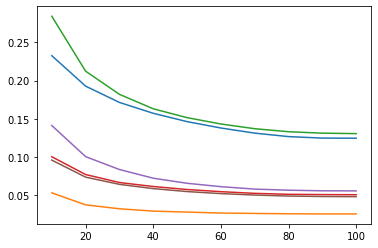

In [37]:


# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = [x for x in range(10, 110, 10)]
color = ['purple', 'red', 'green', 'orange', 'blue', 'brown']
for i, b in enumerate(buffer):
    b = [1-e for e in b]
    ax.plot(x, b, color=f'tab:{color[i]}')

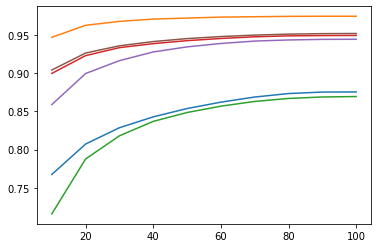

In [38]:

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = [x for x in range(10, 110, 10)]
color = ['purple', 'red', 'green', 'orange', 'blue', 'brown']
for i, b in enumerate(buffer):
    ax.plot(x, b, color=f'tab:{color[i]}')

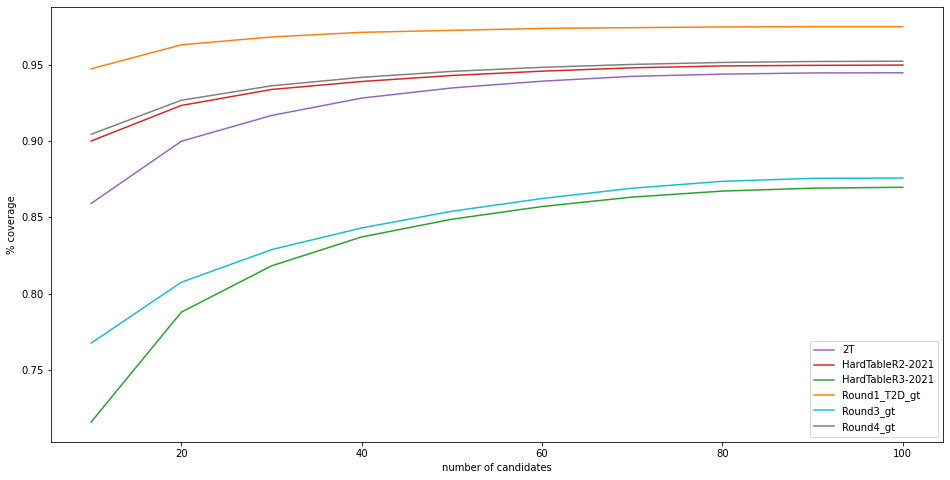

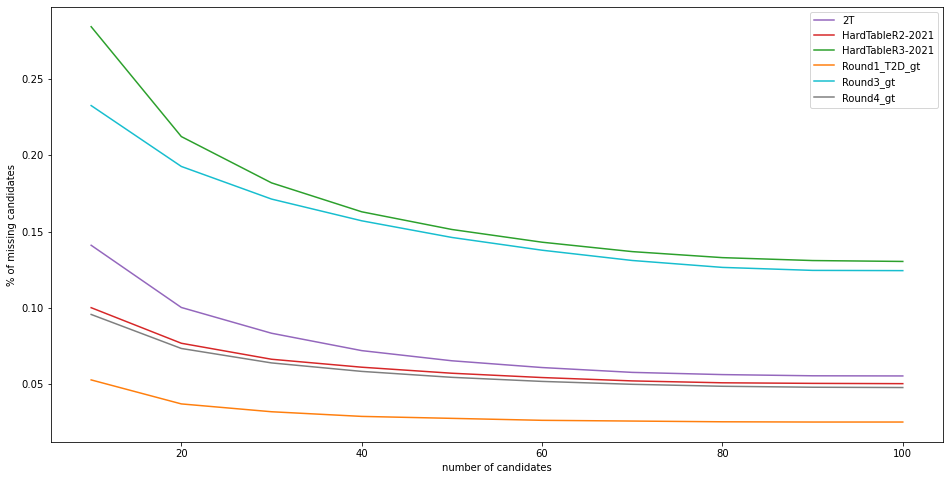

In [66]:
x = [x for x in range(10, 110, 10)]
color = [
    ('purple', '2T'), 
    ('red', 'HardTableR2-2021'), 
    ('green', 'HardTableR3-2021'), 
    ('orange', 'Round1_T2D_gt'), 
    ('cyan', 'Round3_gt'), 
    ('gray', 'Round4_gt')
    ]

plt.figure(figsize=(16, 8))
for i, b in enumerate(buffer):
    plt.plot(x, b, '-', color=f'tab:{color[i][0]}', label=color[i][1])
    #ax.plot(x, b, color=f'tab:{color[i]}')
plt.xlabel("number of candidates")    
plt.ylabel("% coverage")     
plt.legend()    
plt.show()    

plt.figure(figsize=(16,8))
for i, b in enumerate(buffer):
    b = [1-i for i in b]
    plt.plot(x, b, '-', color=f'tab:{color[i][0]}', label=color[i][1])
    #ax.plot(x, b, color=f'tab:{color[i]}')
plt.xlabel("number of candidates")    
plt.ylabel("% of missing candidates")     
plt.legend()
plt.show()    

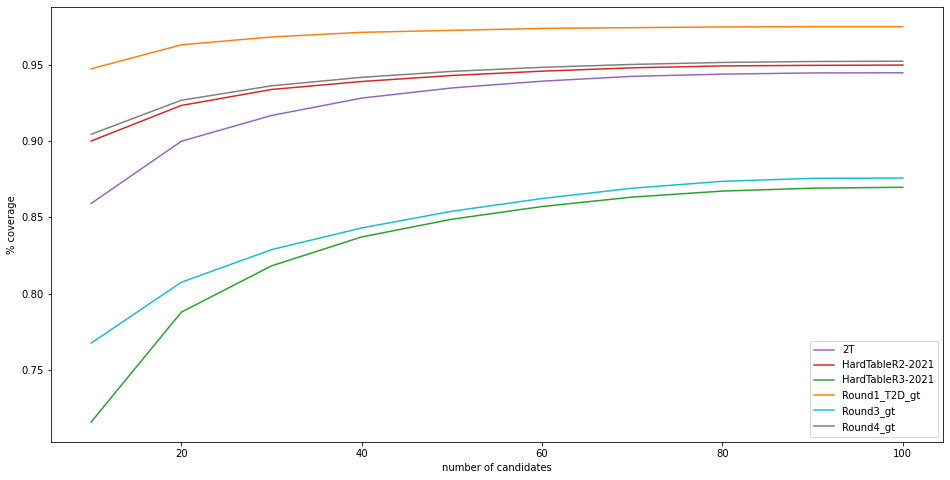

In [67]:
plt.figure(figsize=(16, 8))
for i, b in enumerate(buffer):
    plt.plot(x, b, '-', color=f'tab:{color[i][0]}', label=color[i][1])
    #ax.plot(x, b, color=f'tab:{color[i]}')
plt.xlabel("number of candidates")    
plt.ylabel("% coverage")     
plt.legend()    
plt.show()  

In [7]:
# Make a separate list for each airline
for i,d in enumerate(dataset):
    mentions = pd.read_csv(f"data/export/correct/logistic1_score/{d}_100_m1.csv")
    x1 = mentions[mentions["outcome"] == "correct"]["score"]
    x2 = mentions[mentions["outcome"] == "uncorrect"]["score"]


    # Assign colors for each airline and the names
    colors = ['GREEN', 'RED']
    names = ['correct', 'incorrect']
    f = plt.figure(figsize=(50,20))
    ax = plt.subplot(2, 3, i + 1)
    # Make the histogram using a list of lists
    # Normalize the flights and assign colors and names
    ax.hist([x1, x2], bins = int(100), color = colors, label=names)

    # Plot formatting
    ax.legend()
    ax.set_xlabel('Prediction Value Scores')
    ax.set_ylabel('Count')
    ax.set_title(f'Precision by confidence on {d}')
    plt.savefig(f'./data/scores/{d}.png', bbox_inches="tight")


plt.tight_layout()
plt.show()

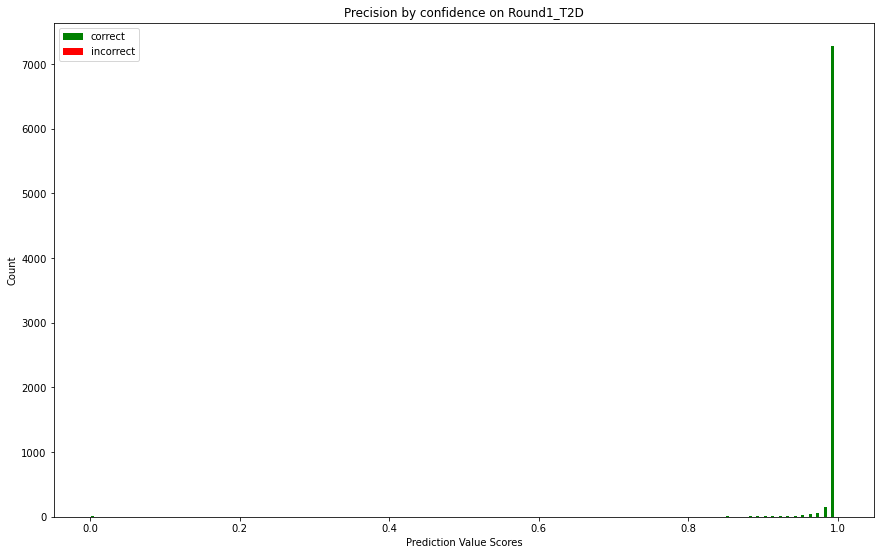

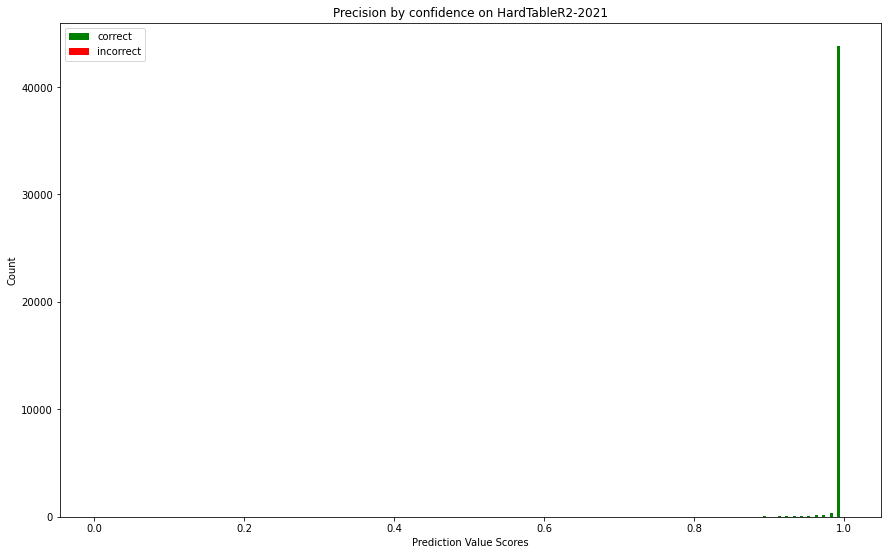

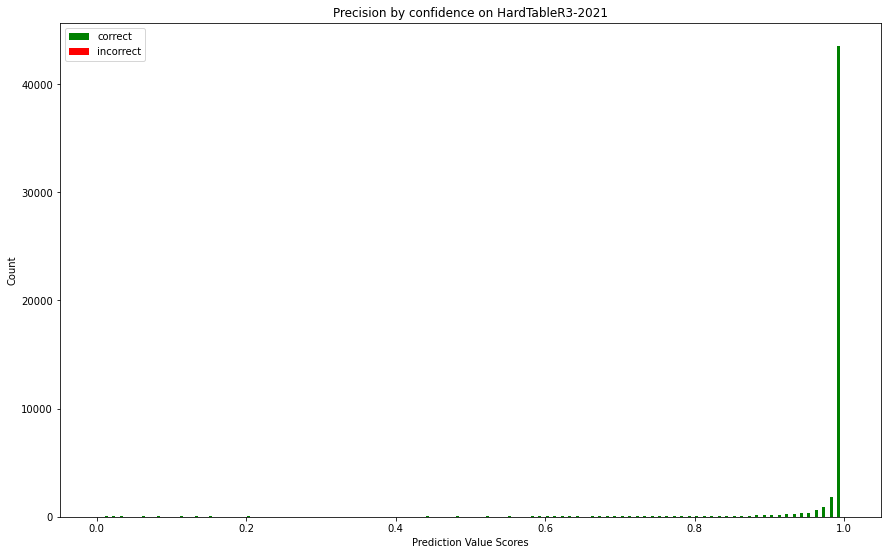

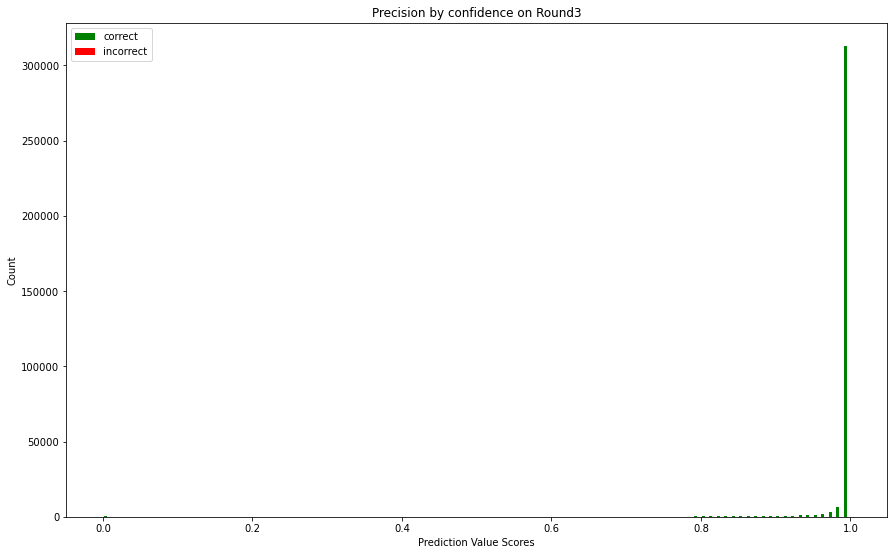

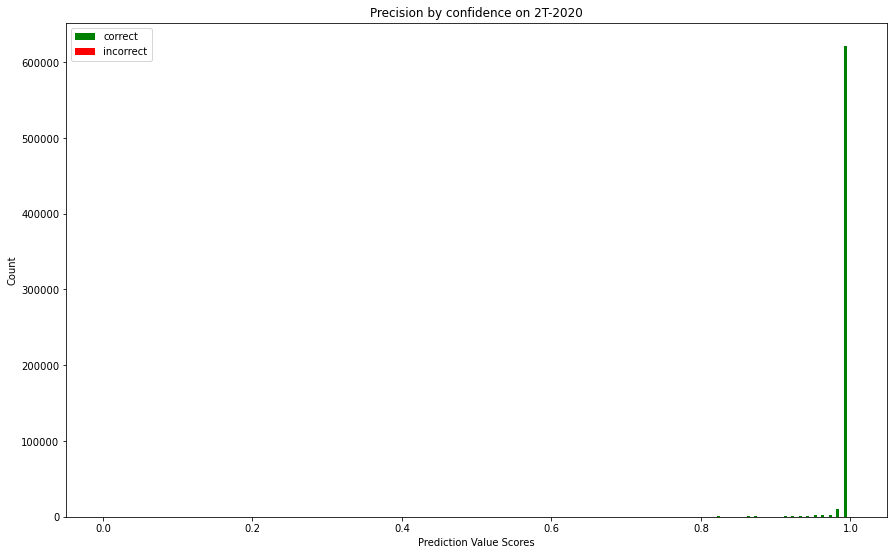

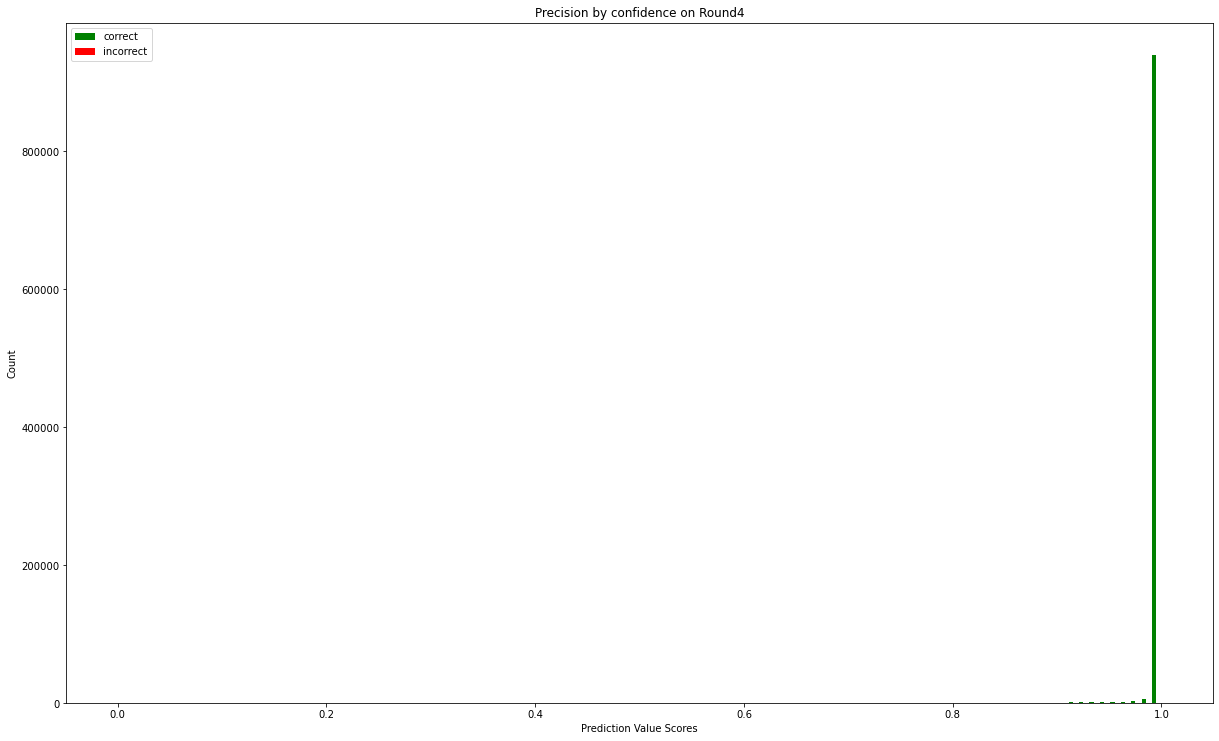

In [6]:
# Make a separate list for each airline
for i,d in enumerate(dataset):
    mentions = pd.read_csv(f"data/export/correct/logistic1_score/{d}_100_m1.csv")
    x1 = mentions[mentions["outcome"] == "correct"]["score"]
    x2 = mentions[mentions["outcome"] == "uncorrect"]["score"]


    # Assign colors for each airline and the names
    colors = ['GREEN', 'RED']
    names = ['correct', 'incorrect']
    f = plt.figure(figsize=(50,20))
    ax = plt.subplot(2, 3, i + 1)
    # Make the histogram using a list of lists
    # Normalize the flights and assign colors and names
    ax.hist([x1, x2], bins = int(100), color = colors, label=names)

    # Plot formatting
    ax.legend()
    ax.set_xlabel('Prediction Value Scores')
    ax.set_ylabel('Count')
    ax.set_title(f'Precision by confidence on {d}')
    plt.savefig(f'./data/scores/{d}.png', bbox_inches="tight")


plt.tight_layout()
plt.show()

In [41]:
x1

111       0.005
152       0.005
171       0.006
203       0.006
254       0.007
          ...  
664096    1.000
664097    1.000
664098    1.000
664099    1.000
664100    1.000
Name: score, Length: 581255, dtype: float64

In [20]:
from pathlib import Path

cea_c = mongodb_conn.get_collection("candidateScored")
total_wrong = 0
for id_dataset in dataset:
    #id_dataset = "HardTableR3-2021"
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    cea_gt = utils.get_cea_ann(cea_target_path)
    ids_dataset = [f"{id_dataset}_100_m1"]
    out = {"neural1_score": {}, "neural2_score": {}, "logistic1_score": {}, "logistic2_score": {}}
    for iteration, name in enumerate(ids_dataset):
        results = cea_c.find({"datasetName": name})
        total = cea_c.count_documents({"datasetName": name})
        for result in tqdm(results, total=total):
            id_table = result["tableName"]
            id_row = result["row"]
            for id_col, item in enumerate(result["candidates"]):
                key = f"{id_table} {id_row} {id_col}"
                if key not in cea_gt or cea_gt.get(key) is None:
                    continue
                if len(item) >= 1:
                    for model_score in out:
                        item = sorted(item, key=lambda x: x[1][model_score], reverse=True)
                        id_entity = item[0][1]["id"].lower()
                        score = item[0][1][model_score]
                        outcome = "correct" if id_entity in cea_gt.get(key, []) else "uncorrect"
                        if outcome == "uncorrect":
                            total_wrong += 1
                        out[model_score][key] = {
                            "datset": id_dataset,
                            "key": key,
                            "gt": cea_gt.get(key),
                            "id": id_entity,
                            "score": score,
                            "outcome": outcome
                        }
        for model_score in out: 
            buffer = list(out[model_score].values())            
            buffer = sorted(buffer, key=lambda x: x["score"], reverse=False)        
            Path(f"data/export/{model_score}").mkdir(parents=True, exist_ok=True)
            pd.DataFrame(buffer).to_csv(f"data/export/{model_score}/{name}.csv", index=False)       
    #break   

100%|██████████| 475897/475897 [23:10<00:00, 342.20it/s]


In [36]:
from pathlib import Path

cea_c = mongodb_conn.get_collection("candidateScored")
total_wrong = 0
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    cea_gt = utils.get_cea_ann(cea_target_path)
    name = f"{id_dataset}_100_m1"
    out = {"neural1_score": {}, "neural2_score": {}, "logistic1_score": {}, "logistic2_score": {}}
    out = {model: {"correct": [], "uncorrect": []} for model in out}
    results = cea_c.find({"datasetName": name})
    total = cea_c.count_documents({"datasetName": name})
    for result in tqdm(results, total=total):
        id_table = result["tableName"]
        id_row = result["row"]
        for id_col, item in enumerate(result["candidates"]):
            key = f"{id_table} {id_row} {id_col}"
            if key not in cea_gt or cea_gt.get(key) is None:
                continue
            if len(item) >= 1:
                for model_score in out:
                    item = sorted(item, key=lambda x: x[1][model_score], reverse=True)
                    for e in item:
                        id_entity = e[1]["id"].lower()
                        score = e[1][model_score]
                        outcome = "correct" if id_entity in cea_gt.get(key, []) else "uncorrect"
                        out[model_score][outcome].append({
                            "datset": id_dataset,
                            "key": key,
                            "gt": cea_gt.get(key),
                            "id": id_entity,
                            "score": score,
                            "outcome": outcome
                        })
    for model_score in out: 
        for outcome in out[model]:
            buffer = out[model_score][outcome]
            buffer = sorted(buffer, key=lambda x: x["score"], reverse=False)        
            Path(f"data/export/{outcome}/{model_score}").mkdir(parents=True, exist_ok=True)
            pd.DataFrame(buffer).to_csv(f"data/export/{outcome}/{model_score}/{name}.csv", index=False)       

100%|██████████| 475897/475897 [40:07<00:00, 197.65it/s]  


In [22]:
gt = {"neural1_score": {}, "neural2_score": {}, "logistic1_score": {}, "logistic2_score": {}}
dataset_size = {f"{d}_100_m1.csv":len(pd.read_csv(dataset[d]["cea"])) for d in dataset}
for model in os.listdir("data/export/"):
    print("\n", model)
    for file in os.listdir(f"data/export/{model}"):
        if file.startswith("."):
            continue
        data = pd.read_csv(f"data/export/{model}/{file}")
        total_correct = len(data[data["outcome"]=="correct"])
        P = total_correct / len(data)
        R = total_correct / dataset_size[file]
        F1 = (2*P*R) / (P+R)
        print(file, f"P:{P}, R:{R}, F1:{F1}")


 logistic2_score
Round1_T2D_100_m1.csv P:0.838266253869969, R:0.8379549393414212, F1:0.8381105676964031
HardTableR2-2021_100_m1.csv P:0.8702706141839158, R:0.865005586121124, F1:0.8676301128014293
Round4_100_m1.csv P:0.8981269695789013, R:0.8943121054959192, F1:0.8962154779327703
HardTableR3-2021_100_m1.csv P:0.5811989100817438, R:0.5789509398113591, F1:0.5800727470510249
Round3_100_m1.csv P:0.7339136804146946, R:0.7339136804146946, F1:0.7339136804146946
2T-2020_100_m1.csv P:0.8922113285674635, R:0.8912779901774915, F1:0.8917444151544323

 neural1_score
Round1_T2D_100_m1.csv P:0.77671826625387, R:0.7764298093587522, F1:0.7765740110196248
HardTableR2-2021_100_m1.csv P:0.90318544282321, R:0.8977212841754675, F1:0.9004450740556712
Round4_100_m1.csv P:0.9152553664400915, R:0.9113677481606561, F1:0.9133074202740312
HardTableR3-2021_100_m1.csv P:0.7864782016348774, R:0.7834362488973332, F1:0.7849542781384914
Round3_100_m1.csv P:0.749754133628373, R:0.749754133628373, F1:0.749754133628373
2T

In [16]:
dataset_size

{'Round1_T2D_100_m1': 8078,
 'HardTableR2-2021_100_m1': 47439,
 'HardTableR3-2021_100_m1': 58948,
 'Round3_100_m1': 390456,
 '2T-2020_100_m1': 667243,
 'Round4_100_m1': 994920}

In [ ]:
cea_gt["6GUK4TSI 4 0"], cea_gt["6GUK4TSI 4 0"]

In [ ]:
test = sorted(temp, key=lambda x: x["score"], reverse=True)
test[0:100]

In [ ]:
cea_c = mongodb_conn.get_collection("candidateScored")
total_wrong = 0
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    cea_gt = utils.get_cea_ann(cea_target_path)
    ids_dataset = [f"{id_dataset}_net1"]
    keys = set()
    for iteration, name in enumerate(ids_dataset):
        out = []
        results = cea_c.find({"tableName": name})
        total = cea_c.count_documents({"tableName": name})
        for result in tqdm(results, total=total):
            id_table = result["tableName"]
            id_row = result["row"]
            for id_col, item in enumerate(result["winningCandidates"]):
                key = f"{id_table} {id_row} {id_col}"
                if key not in cea_gt or cea_gt.get(key) is None:
                    continue
                if len(item) > 0:
                    if key in keys:
                        continue
                    keys.add(key)
                    id_entity = item[0]["id"].lower()
                    score = item[0]["score"]
                    outcome = "OK" if id_entity in cea_gt.get(key, []) else "WRONG"
                    if outcome == "WRONG":
                        total_wrong += 1
                    out.append({
                        "key": key,
                        "gt": cea_gt.get(key),
                        "id": id_entity,
                        "score": score,
                        "outcome": outcome
                    })
                    
        for key in cea_gt:
            if key not in keys:
                out.append({
                    "key": key,
                    "gt": cea_gt.get(key),
                    "id": None,
                    "score": 0,
                    "outcome": "WRONG"
                })
        out = sorted(out, key=lambda x: x["score"], reverse=False)        
        pd.DataFrame(out).to_csv(f"data/iterations/{name}.csv", index=False)

In [22]:
cea_c = mongodb_conn.get_collection("ceaInit")
total_wrong = 0
dataset_stats = {}
for id_dataset in dataset:
    #id_dataset = "2T-2020"
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    cea_gt = utils.get_cea_ann(cea_target_path)
    ids_dataset = [f"{id_dataset}_100_net1"]
    out = []
    for iteration, name in enumerate(ids_dataset):
        results = cea_c.find({"datasetName": name})
        total = cea_c.count_documents({"datasetName": name})
        dataset_stats[name] = {"ok": 0, "error":0, "total": 0}
        for result in tqdm(results, total=total):
            id_table = result["tableName"]
            id_row = result["row"]
            for id_col, item in enumerate(result["winningCandidates"]):
                key = f"{id_table} {id_row} {id_col}"
                if key not in cea_gt or cea_gt.get(key) is None:
                    continue
                dataset_stats[name]["total"] += 1    
                found_ok = False
                if len(item) > 1:
                    for candidate in item:
                        id_entity = candidate["id"].lower()
                        score = candidate["score"]
                        outcome = "OK" if id_entity in cea_gt.get(key, []) else "WRONG"
                        if outcome == "OK":
                            dataset_stats[name]["ok"] += 1
                            found_ok = True
                        out.append({
                            "datset": id_dataset,
                            "key": key,
                            "gt": cea_gt.get(key),
                            "id": id_entity,
                            "score": score,
                            "outcome": outcome
                        })
                if len(item) > 1 and not found_ok: 
                    dataset_stats[name]["error"] += 1
                
        buffer = out          
        #buffer = sorted(buffer, key=lambda x: x["score"], reverse=False)        
        pd.DataFrame(buffer).to_csv(f"data/errors/{name}.csv", index=False)        

100%|██████████| 8078/8078 [00:00<00:00, 95736.39it/s]
0it [00:00, ?it/s]
100%|██████████| 475370/475370 [02:12<00:00, 3580.02it/s]


In [26]:
[(d, dataset_stats[d]["ok"]/dataset_stats[d]["total"], dataset_stats[d]["error"]/dataset_stats[d]["total"]) for d in dataset_stats]

[('HardTableR2-2021_100_net1', 0.22835641560741163, 0.04165349185269504),
 ('HardTableR3-2021_100_net1', 0.5464477166316075, 0.13790120105856007),
 ('Round3_100_net1', 0.2711829245804905, 0.1338998504312906),
 ('2T-2020_100_net1', 0.25943632520741033, 0.04053283589948025),
 ('Round4_100_net1', 0.2271209051234122, 0.029732813138213215)]

In [25]:
del dataset_stats["Round1_T2D_100_net1"]

In [23]:
dataset_stats

{'Round1_T2D_100_net1': {'ok': 0, 'error': 0, 'total': 0},
 'HardTableR2-2021_100_net1': {'ok': 10833, 'error': 1976, 'total': 47439},
 'HardTableR3-2021_100_net1': {'ok': 32212, 'error': 8129, 'total': 58948},
 'Round3_100_net1': {'ok': 105885, 'error': 52282, 'total': 390456},
 '2T-2020_100_net1': {'ok': 172459, 'error': 26944, 'total': 664745},
 'Round4_100_net1': {'ok': 225755, 'error': 29554, 'total': 993986}}

In [ ]:
cea_c = mongodb_conn.get_collection("ceaInit")
total_wrong = 0
for id_dataset in dataset:
    #id_dataset = "2T-2020"
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    cea_gt = utils.get_cea_ann(cea_target_path)
    ids_dataset = [f"{id_dataset}_100_net1"]
    out = {}
    for iteration, name in enumerate(ids_dataset):
        results = cea_c.find({"datasetName": name})
        total = cea_c.count_documents({"datasetName": name})
        for result in tqdm(results, total=total):
            id_table = result["tableName"]
            id_row = result["row"]
            for id_col, item in enumerate(result["winningCandidates"]):
                key = f"{id_table} {id_row} {id_col}"
                if key not in cea_gt or cea_gt.get(key) is None:
                    continue
                if len(item) >= 1:
                    id_entity = item[0]["id"].lower()
                    score = item[0]["score"]
                    outcome = "OK" if id_entity in cea_gt.get(key, []) else "WRONG"
                    if outcome == "WRONG":
                        total_wrong += 1
                    out[key] = {
                        "datset": id_dataset,
                        "key": key,
                        "gt": cea_gt.get(key),
                        "id": id_entity,
                        "score": score,
                        "outcome": outcome
                    }
        buffer = list(out.values())            
        buffer = sorted(buffer, key=lambda x: x["score"], reverse=False)        
        pd.DataFrame(buffer).to_csv(f"data/iterations/{name}.csv", index=False)         

In [ ]:
buffer = sorted(buffer, key=lambda x: x["score"], reverse=True) 
buffer

In [80]:
total = cea_c.count_documents({"datasetName": name})
total, name

(0, 'HardTableR3-2021_100_m1')

In [78]:
ids_dataset

['HardTableR3-2021_100_m1']

In [118]:
cea_c = mongodb_conn.get_collection("cea")
total_wrong = 0
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    cea_gt = utils.get_cea_ann(cea_target_path)
    ids_dataset = [f"{id_dataset}_10", f"{id_dataset}_10_i2"]
    out = {}
    for iteration, name in enumerate(ids_dataset):
        results = cea_c.find({"idDataset": name})
        total = cea_c.count_documents({"idDataset": name})
        for result in tqdm(results, total=total):
            id_table = result["tableName"]
            id_row = result["row"]
            for id_col, item in enumerate(result["winningCandidates"]):
                key = f"{id_table} {id_row} {id_col}"
                if key not in cea_gt or cea_gt.get(key) is None:
                    continue
                if len(item) >= 1:
                    id_entity = item[0]["id"].lower()
                    score = item[0]["score"]
                    outcome = "OK" if id_entity in cea_gt.get(key, []) else "WRONG"
                    if outcome == "WRONG":
                        total_wrong += 1
                    if len(item) > 1:
                        outcome = "WRONG"    
                    out[key] = {
                        "datset": id_dataset,
                        "key": key,
                        "gt": cea_gt.get(key),
                        "id": id_entity,
                        "score": score,
                        "outcome": outcome
                    }
        buffer = list(out.values())            
        buffer = sorted(buffer, key=lambda x: x["score"], reverse=False)        
        pd.DataFrame(buffer).to_csv(f"data/iterations/{id_dataset}_iteration_{iteration+1}.csv", index=False)

100%|██████████| 237340/237340 [01:45<00:00, 2258.87it/s]


In [148]:
from copy import deepcopy


def global_revision(candidates_ranked, cpa, cta):
    
    def check(candidate, max_score, threshold=0.30):
            return (max_score - candidate["score"] < threshold)

    weights = {"cpa": 2, "cta": 3, "ctaMax": 2, "cpaMax": 1} 
    max_final_score = 0
    for candidate in candidates_ranked:
        predicates = candidate["pred"]
        cpa_score = 0
        max_cpa_score = 0
        for idCol in predicates:
            wp = max(predicates[idCol].items(), key=lambda x: x[1], default=[None])[0]
            cpa_score += cpa.get(wp, 0)
            if cpa.get(wp, 0) > max_cpa_score:
                max_cpa_score = cpa.get(wp, 0)

        types = candidate["types"]         
        cta_score = 0
        max_cta_score = 0
        for t in types:
            id_type = t["id"]
            cta_score += cta.get(id_type, 0)
            if cta.get(id_type, 0) > max_cta_score:
                max_cta_score = cta.get(id_type, 0)


        candidate["features"]["cpa"] = cpa_score
        candidate["features"]["cpaMax"] = max_cpa_score
        candidate["features"]["cta"] = cta_score
        candidate["features"]["ctaMax"] = max_cta_score
        candidate["score"] += sum([candidate["features"][feature] * weights[feature] for feature in weights])

        if cta_score < 0.1:
            candidate["score"] *= 0.01

        candidate["score"] = round(candidate["score"], 3)

        if candidate["score"] > max_final_score:
            max_final_score = candidate["score"]


    rank = sorted(candidates_ranked, key=lambda x: x["score"], reverse=True)
    wc = [candidate for candidate in rank if check(candidate, max_final_score)]
       
    return wc


cea_c = mongodb_conn.get_collection("cea")
total_wrong = 0
for id_dataset in dataset:
    id_dataset = "2T-2020"
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    cea_gt = utils.get_cea_ann(cea_target_path)
    ids_dataset = [f"{id_dataset}_10"]
    out = {}
    cea_buffer = []
    for iteration, name in enumerate(ids_dataset):
        results = cea_c.find({"idDataset": name})
        total = cea_c.count_documents({"idDataset": name})
        for result in tqdm(results, total=total):
            id_table = result["tableName"]
            id_row = result["row"]
            for id_col, item in enumerate(result["winningCandidates"]):
                key = f"{id_table} {id_row} {id_col}"
                if key not in cea_gt or cea_gt.get(key) is None:
                    continue
                if len(item) >= 1:
                    id_entity = item[0]["id"].lower()
                    score = item[0]["score"]
                    outcome = "OK" if id_entity in cea_gt.get(key, []) else "WRONG"
                    if len(item) > 1:
                        outcome = "WRONG" 
                    out[key] = {
                        "datset": id_dataset,
                        "key": key,
                        "gt": cea_gt.get(key),
                        "id": id_entity,
                        "score": score,
                        "outcome": outcome
                    }
                    if len(item) > 1:
                        cea_buffer.append((key, item))
                    
    cta_weights, cta_buffer = utils.get_cta_types_table_to_column(id_dataset)
    cpa_weights, cpa_buffer = utils.get_cpa_types_table_to_column(id_dataset)
    #idx = int(len(cea_buffer)*60/100)
    new_cea_buffer = sorted(cea_buffer, key=lambda x: x[1][0]['score'], reverse=True)
    #new_cea_buffer = new_cea_buffer[0:idx+1]
    buffer = []
    temp = []
    for item in tqdm(new_cea_buffer):
        key = item[0]
        table_name, _, id_col = key.split(" ")
        cpa, cta = (cpa_weights[table_name][id_col], cta_weights[table_name][id_col])
        candidates_ranked = deepcopy(item[1])
        wc = global_revision(candidates_ranked, cpa, cta)
        if len(wc) == 1:
            id_entity = wc[0]["id"].lower()
            score = wc[0]["score"]
            outcome = "OK" if id_entity in cea_gt.get(key, []) else "WRONG"
            out[key] = {
                "datset": id_dataset,
                "key": key,
                "gt": cea_gt.get(key),
                "id": id_entity,
                "score": score,
                "outcome": outcome
            }
            buffer.append((key, id_entity, score, outcome))
    buffer = list(out.values())            
    buffer = sorted(buffer, key=lambda x: x["score"], reverse=False)        
    pd.DataFrame(buffer).to_csv(f"data/iterations/{id_dataset}_global_revision.csv", index=False)
    break

100%|██████████| 33785/33785 [00:25<00:00, 1306.45it/s]


In [134]:
buffer = list(out.values())            
buffer = sorted(buffer, key=lambda x: x["score"], reverse=False)        
pd.DataFrame(buffer).to_csv(f"data/iterations/{id_dataset}_global_revision.csv", index=False)

In [104]:
idx = int(len(cea_buffer)*60/100)
new_cea_buffer = sorted(cea_buffer, key=lambda x: x[1][0]['score'], reverse=True)
new_cea_buffer = new_cea_buffer[0:idx+1]

In [129]:
len(cea_buffer), len(out)

(33785, 33785)

In [ ]:
key = cea_buffer[20:21][0][0]
table_name, _, id_col = key.split(" ")
cpa, cta = cpa_weights[table_name][id_col], cta_weights[table_name][id_col]
rank,  = global_revision(cea_buffer[20:21], cpa, cta)

In [ ]:
key = new_cea_buffer[20:21][0][0]
table_name, _, id_col = key.split(" ")
cpa, cta = cpa_weights[table_name][id_col], cta_weights[table_name][id_col]
rank = global_revision(new_cea_buffer[20:21], )

In [ ]:
wc = global_revision(new_cea_buffer, cpa_weights, cta_weights) 

In [109]:
from copy import deepcopy

buffer = []
temp = []
for item in tqdm(new_cea_buffer):
    key = item[0]
    table_name, _, id_col = key.split(" ")
    cpa, cta = (cpa_weights[table_name][id_col], cta_weights[table_name][id_col])
    candidates_ranked = deepcopy(item[1])
    wc = global_revision(candidates_ranked, cpa, cta)
    if len(wc) == 1:
        buffer.append(wc[0])
        if wc[0]["id"] == "Q139325":
            temp.append(key)

100%|██████████| 20272/20272 [00:12<00:00, 1645.09it/s]


In [112]:
len(buffer)

11484

In [152]:
buffer[10]

{'datset': '2T-2020',
 'key': '9XAJBIJV 8134 3',
 'gt': ['q1397', 'q12917218', 'q16037495', 'q19746678'],
 'id': 'q25312',
 'score': 0.021,
 'outcome': 'WRONG'}

In [ ]:
sorted(cea_buffer, key=lambda x: x[1][0]["score"], reverse=True)[10:50]

In [ ]:
cea_buffer[

In [149]:
len(buffer), len(cea_buffer), len(buffer)/len(cea_buffer)

(665732, 33785, 19.704957821518427)

In [ ]:
key = cea_buffer[0:1][0][0]
table_name, _, id_col = key.split(" ")
cpa_weights[table_name][id_col], cta_weights[table_name][id_col]

In [ ]:
cea_buffer[23]

In [ ]:
result = sorted(buffer, key=lambda x: x["score"], reverse=True)
result = {item["id"]: item for item in result}
sorted(result.values(), key=lambda x: x["score"], reverse=True)

In [ ]:
cea_buffer[0]

In [ ]:
"1438042986423_95_20150728002306-00125-ip-10-236-191-2_88435628_5 6 0" in keys

In [ ]:
item.

In [ ]:
len(keys)

In [ ]:
len(out)

In [ ]:
cea_c = mongodb_conn.get_collection("cea")
total_wrong = 0

for id_dataset in dataset:
    id_dataset = "Round4"
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    cea_gt = utils.get_cea_ann(cea_target_path)
    ids_dataset = [id_dataset, f"{id_dataset}_iteration_1", f"{id_dataset}_iteration_2"]
    for iteration, name in enumerate(ids_dataset):
        out = []
        results = cea_c.find({"idDataset": name})
        total = cea_c.count_documents({"idDataset": name})
        for result in tqdm(results, total=total):
            id_table = result["tableName"]
            id_row = result["row"]
            for id_col, item in enumerate(result["winningCandidates"]):
                if len(item) == 0:
                    continue
                key = f"{id_table} {id_row} {id_col}"
                id_entity = item[0]["id"].lower()
                score = item[0]["score"]
                outcome = "OK" if id_entity in cea_gt.get(key, []) else "WRONG"
                if outcome == "WRONG":
                    total_wrong += 1
                if cea_gt.get(key) is None:
                    continue
                out.append({
                    "key": key,
                    "gt": cea_gt.get(key),
                    "id": id_entity,
                    "score": score,
                    "outcome": outcome
                })
        out = sorted(out, key=lambda x: x["score"], reverse=False)        
        pd.DataFrame(out).to_csv(f"data/iterations/{id_dataset}_iteration_{iteration+1}.csv", index=False)
    break    

In [ ]:
pd.DataFrame(out, index=None, index_key=None).to_csv(f"data/iterations/{id_dataset}_iteration_{iteration}.csv")

In [ ]:
df = pd.DataFrame(out)
df.to_csv("test.csv")

In [ ]:
out

In [ ]:
temp = list(out.values())
test = sorted(temp, key=lambda x: x["score"], reverse=False)
test[0:2]

In [ ]:
[t for t in out if t["outcome"] == "OK"]

In [ ]:
def get_x_y(sorted_out):
    x = thresholds = [round(i, 3) for i in np.arange(0, 1.10, 0.10)]
    y = []
    for threshold in tqdm(thresholds):
        start_idx = int(len(sorted_out)*threshold)
        n_wrong = sum([1 for item in sorted_out[start_idx:] if item["outcome"] == "WRONG"])
        y.append(round(n_wrong/len(sorted_out), 3))   
    return x, y

x, y = get_x_y(test)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.xlabel('cut threshold')
plt.ylabel('errors')
plt.plot(x, y) 
plt.errorbar(x, y, fmt ='o')    

In [ ]:
x, y = get_x_y(test)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.xlabel('cut threshold')
plt.ylabel('errors')
plt.plot(x, y) 
plt.errorbar(x, y, fmt ='o')   


In [27]:
def get_data_from_csv(dataset_name, iterations, size=None):
    buffer = {}
    for iteration in range(iterations):
        if size is None:
            df = pd.read_csv(f"data/iterations/{dataset_name}_iteration_{iteration+1}.csv")
        else:
            df = pd.read_csv(f"data/iterations/{dataset_name}_{size}.csv")
        result = json.loads(df.to_json(orient='records'))
        for item in tqdm(result):
            buffer[item["key"]] = item
    return list(buffer.values())        
        
    
def get_x_y(result):
    sorted_out = sorted(result, key=lambda x: x["score"])
    x = thresholds = [round(i, 3) for i in np.arange(0, 1.10, 0.10)]
    y = []
    for threshold in tqdm(thresholds):
        start_idx = int(len(sorted_out)*threshold)
        n_wrong = sum([1 for item in sorted_out[start_idx:] if item["outcome"] == "WRONG"])
        y.append(round(n_wrong/len(sorted_out), 3))   
    return x, y


def get_x_y2(result):
    sorted_out = sorted(result, key=lambda x: x["score"])
    x = thresholds = [round(i, 3) for i in np.arange(0, 1.10, 0.10)]
    y = []
    for threshold in tqdm(thresholds):
        start_idx = int(len(sorted_out)*threshold)
        n_wrong = sum([1 for item in sorted_out if item["score"] >= start_idx and item["outcome"] == "WRONG"])
        y.append(round(n_wrong/len(sorted_out), 3))   
    return x, y


def plot(result):
    x, y = get_x_y2(result)
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(4)
    plt.xlabel('score')
    plt.ylabel('errors')
    plt.plot(x, y) 
    plt.errorbar(x, y, fmt ='o')   

In [29]:
def get_all_data_from_csv(datasets, iteration, size=None):
    buffer = {}
    out = []
    for dataset_name in datasets:
        if size is None:
            df = pd.read_csv(f"data/iterations/{dataset_name}_iteration_{iteration+1}.csv")
        else:
            df = pd.read_csv(f"data/iterations/{dataset_name}_{size}.csv")
        out.append(df)
        
    df = pd.concat(out, axis=0)
    result = json.loads(df.to_json(orient='records'))
    for item in tqdm(result):
        buffer[item["key"]] = item
    return list(buffer.values())  

def get_my_data():
    buffer = {}
    df = pd.read_csv(f"data/iterations/final4.csv")
    result = json.loads(df.to_json(orient='records'))
    for item in tqdm(result):
        buffer[item["key"]] = item
    return list(buffer.values())  

def write_chart(chart_data, dataset):
    plt.figure(figsize=(16,8))
    plt.title(dataset)
    plt.xlabel('score')
    plt.ylabel('errors')
    color = ["black", "red", "yellow", "blue", "green", "gray"]
    for i, (id_dataset, x, y) in enumerate(chart_data):
        plt.plot(x, y, label=id_dataset.split("_")[0], color=color[i]) 
        plt.errorbar(x, y, fmt ='o')
        #plt.savefig(f"figure/{id_dataset}")
    plt.grid()    
    plt.legend()
    plt.savefig(f"./data/figure/{dataset}")

In [ ]:
result1 = get_all_data_from_csv(dataset, 1, size="10")
result2 = get_all_data_from_csv(dataset, 1, size="100")

In [ ]:
len(result1), len(result2)

In [ ]:
df = pd.read_csv("data/iterations/2T-2020_iteration_1.csv")
result = json.loads(df.to_json(orient='records'))
get_data_from_csv()

In [10]:
dataset

{'Round1_T2D': {'tables': './data/Dataset/Round1_T2D/tables',
  'cea': './data/Dataset/Round1_T2D/gt/CEA_Round1_gt_WD.csv',
  'cpa': './data/Dataset/Round1_T2D/gt/CPA_Round1_gt.csv',
  'cta': './data/Dataset/Round1_T2D/gt/CTA_Round1_gt.csv'},
 'HardTableR2-2021': {'tables': './data/Dataset/HardTablesR2/tables/',
  'cea': './data/Dataset/HardTablesR2/gt/cea.csv',
  'cpa': './data/Dataset/HardTablesR2/gt/cpa.csv',
  'cta': './data/Dataset/HardTablesR2/gt/cta.csv'},
 'HardTableR3-2021': {'tables': './data/Dataset/HardTablesR3/tables/',
  'cea': './data/Dataset/HardTablesR3/gt/cea.csv',
  'cpa': './data/Dataset/HardTablesR3/gt/cpa.csv',
  'cta': './data/Dataset/HardTablesR3/gt/cta.csv'},
 'Round3': {'tables': './data/Dataset/Round3_2019/tables/',
  'cea': './data/Dataset/Round3_2019/gt/CEA_Round3_gt_WD.csv',
  'cpa': './data/Dataset/Round3_2019/gt/CPA_Round3_gt.csv',
  'cta': './data/Dataset/Round3_2019/gt/CTA_Round3_gt.csv'},
 '2T-2020': {'tables': './data/Dataset/2T_Round4/tables/',
  'c

100%|██████████| 11/11 [00:03<00:00,  3.44it/s]


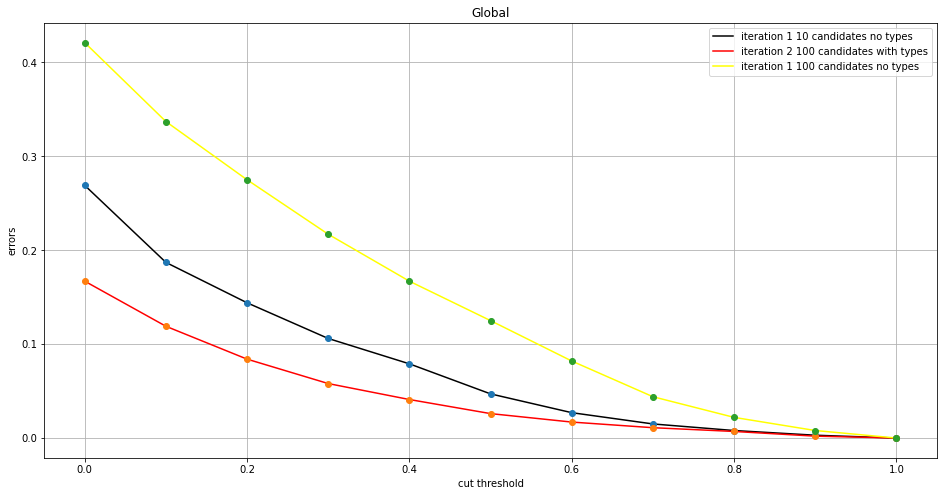

In [119]:
chart_data = []
result = get_all_data_from_csv(dataset, 1, size="10")
(x, y) = get_x_y(result)
chart_data.append((f"iteration 1 10 candidates no types", x, y))

result = get_all_data_from_csv(dataset, 2)
(x, y) = get_x_y(result)
chart_data.append((f"iteration 2 100 candidates with types", x, y))   

result = get_all_data_from_csv(dataset, 1, size="100")
(x, y) = get_x_y(result)
chart_data.append((f"iteration 1 100 candidates no types", x, y))    
write_chart(chart_data, "Global")

100%|██████████| 11/11 [00:01<00:00,  9.89it/s]


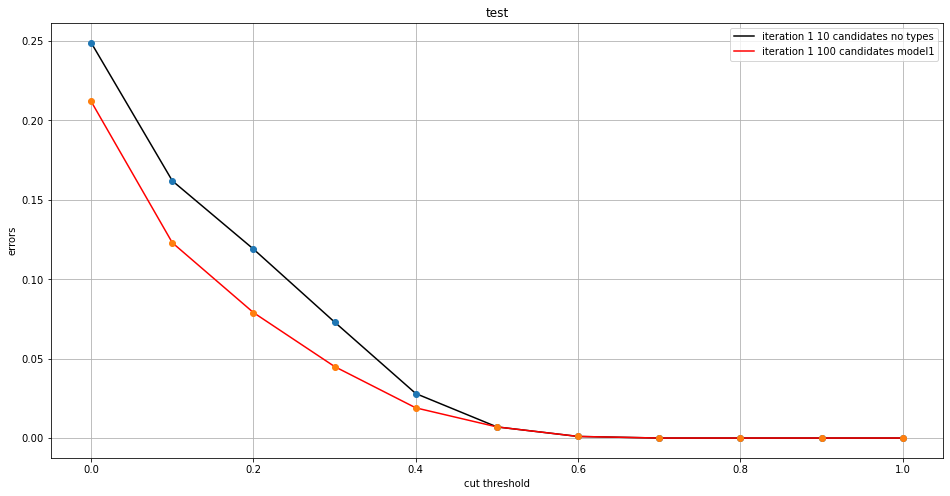

In [15]:
chart_data = []
result = get_all_data_from_csv(["2T-2020"], 1, size="10")
(x, y) = get_x_y(result)
chart_data.append((f"iteration 1 10 candidates no types", x, y))
   

result = get_all_data_from_csv(["2T-2020"], 1, size="100_model1")
(x, y) = get_x_y(result)
chart_data.append((f"iteration 1 100 candidates model1", x, y))    
write_chart(chart_data, "test")

100%|██████████| 11/11 [00:01<00:00,  9.62it/s]


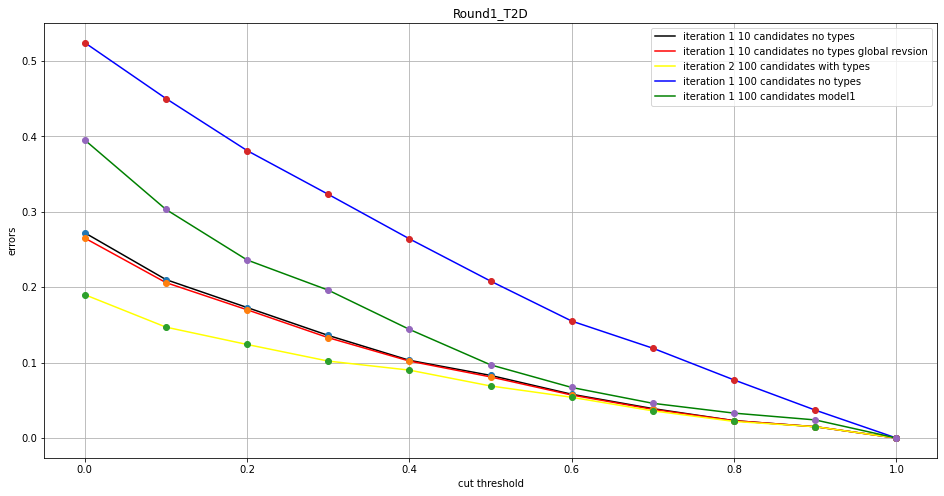

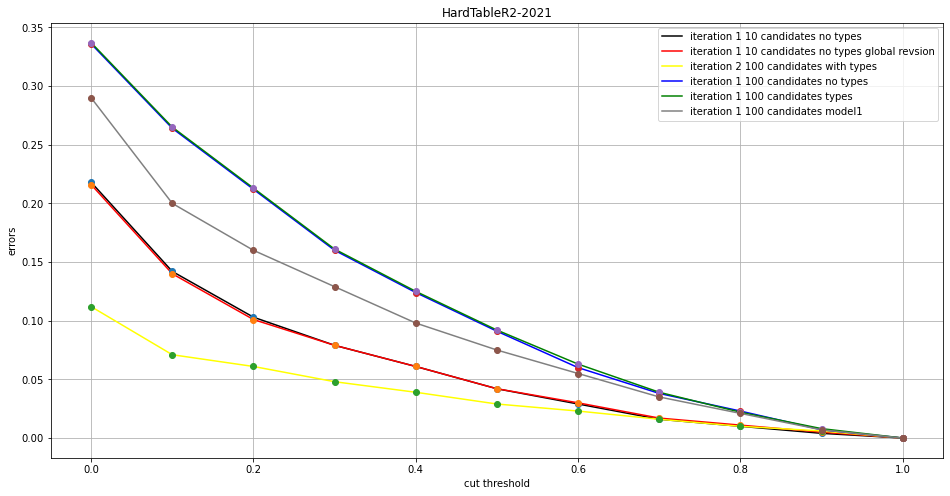

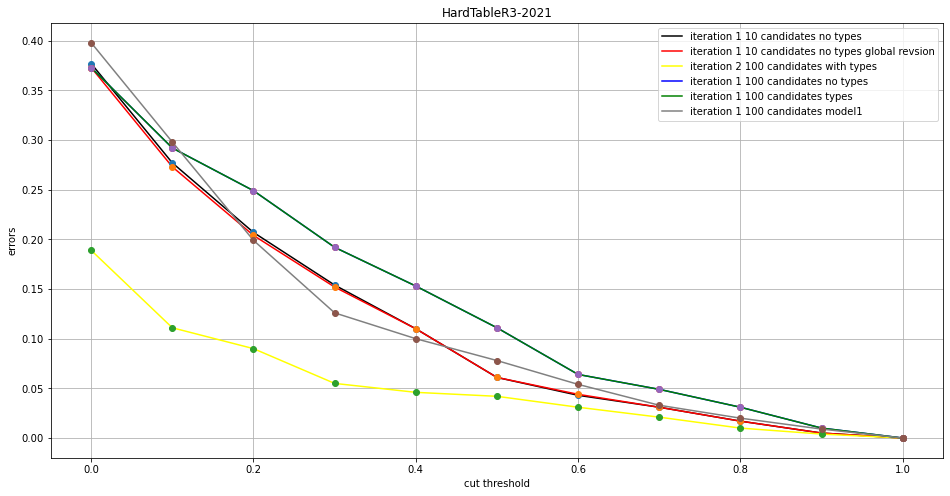

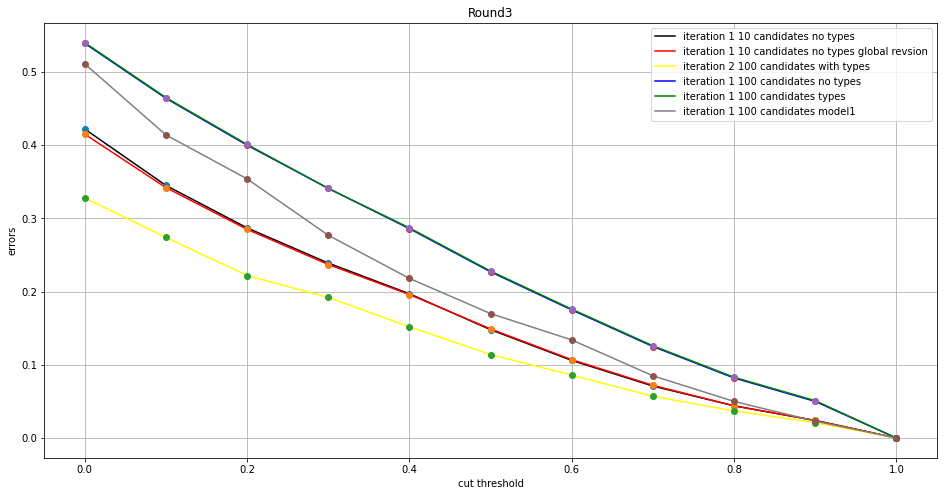

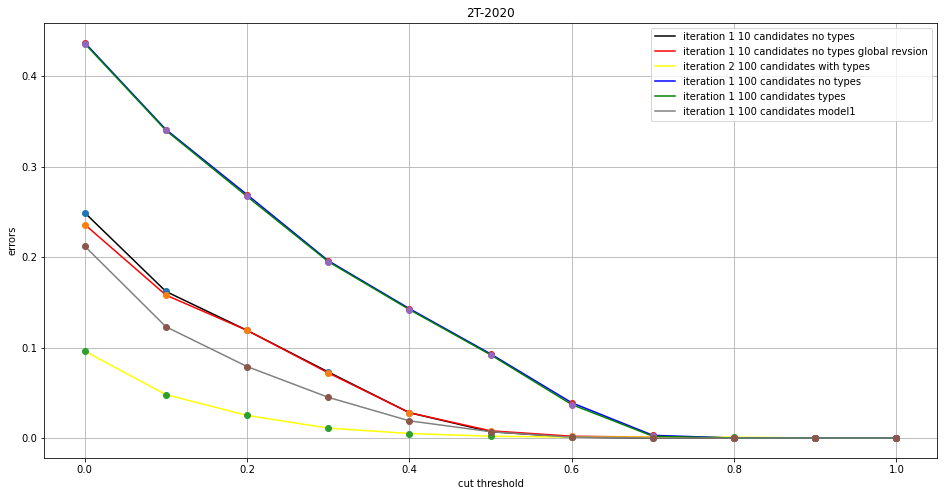

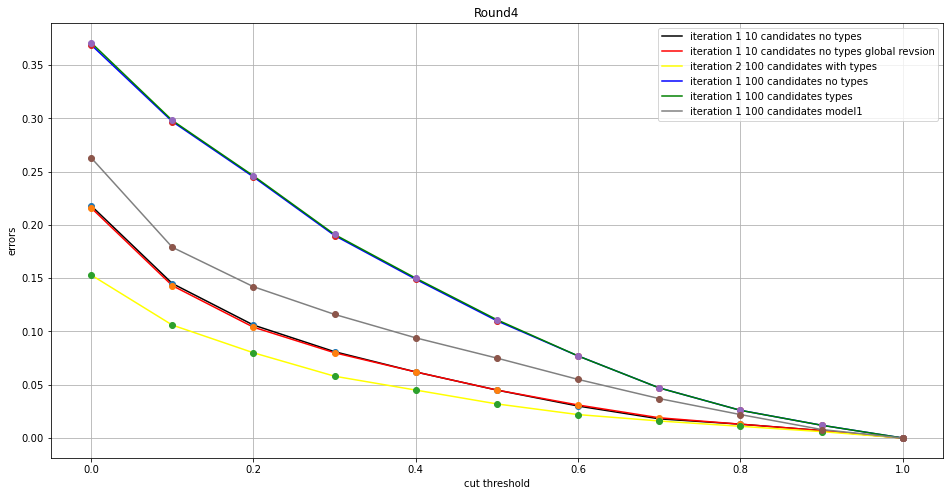

In [21]:
for d in dataset:
    datasets = [d]
    chart_data = []
    result = get_all_data_from_csv(datasets, 1, size="10")
    (x, y) = get_x_y(result)
    chart_data.append((f"iteration 1 10 candidates no types", x, y))    
    
    result = get_all_data_from_csv(datasets, 1, size="global_revision")
    (x, y) = get_x_y(result)
    chart_data.append((f"iteration 1 10 candidates no types global revsion", x, y))    
    
    result = get_all_data_from_csv(datasets, 2)
    (x, y) = get_x_y(result)
    chart_data.append((f"iteration 2 100 candidates with types", x, y))   
    
    result = get_all_data_from_csv(datasets, 1, size="100")
    (x, y) = get_x_y(result)
    chart_data.append((f"iteration 1 100 candidates no types", x, y))    
    
    try:
        result = get_all_data_from_csv(datasets, 1, size="100_i1_types_100_all_types")
        (x, y) = get_x_y(result)
        chart_data.append((f"iteration 1 100 candidates types", x, y))    
    except:
        pass
    
    result = get_all_data_from_csv(datasets, 1, size="100_model1")
    (x, y) = get_x_y(result)
    chart_data.append((f"iteration 1 100 candidates model1", x, y))   
    
    write_chart(chart_data, d)

100%|██████████| 11/11 [00:02<00:00,  5.36it/s]


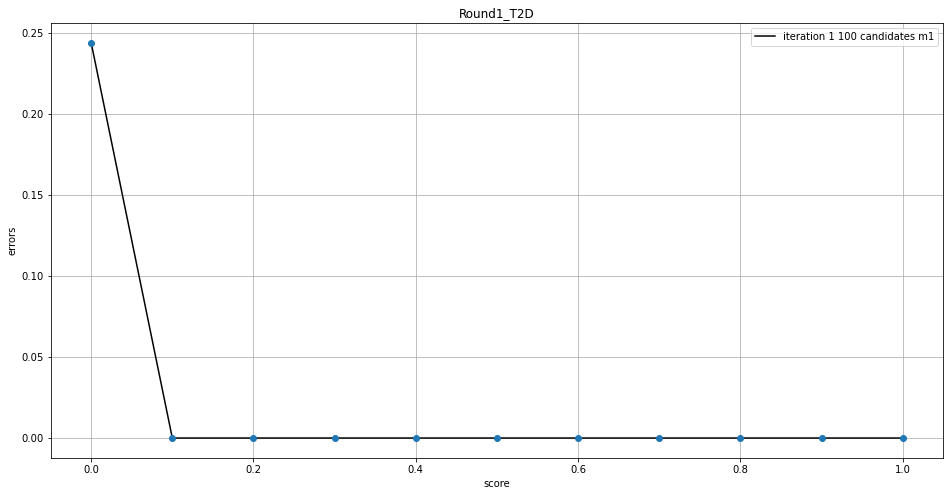

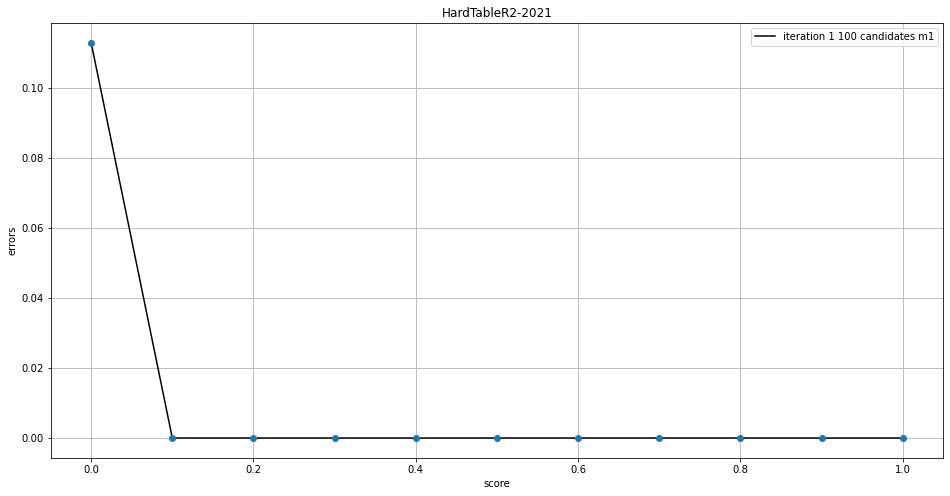

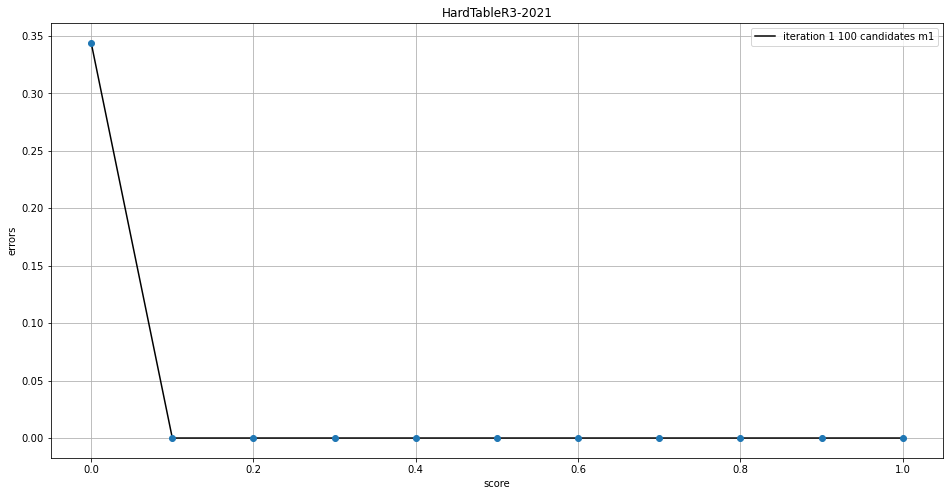

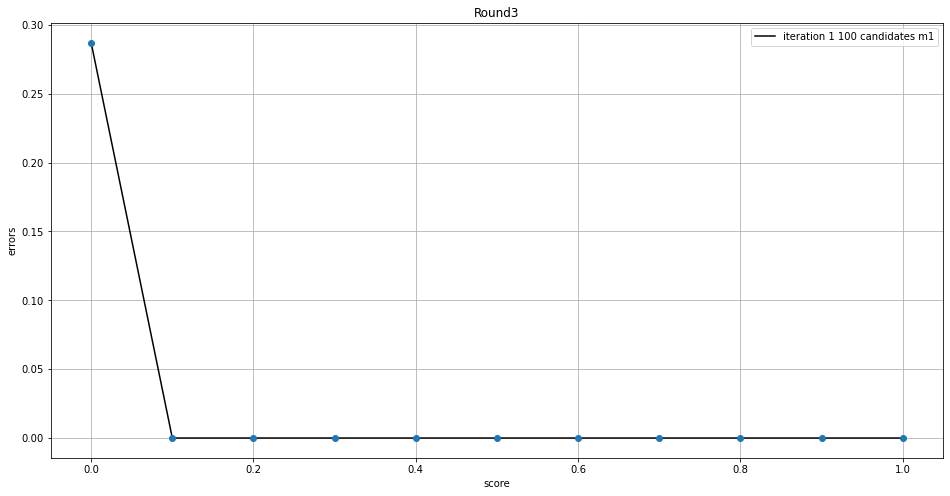

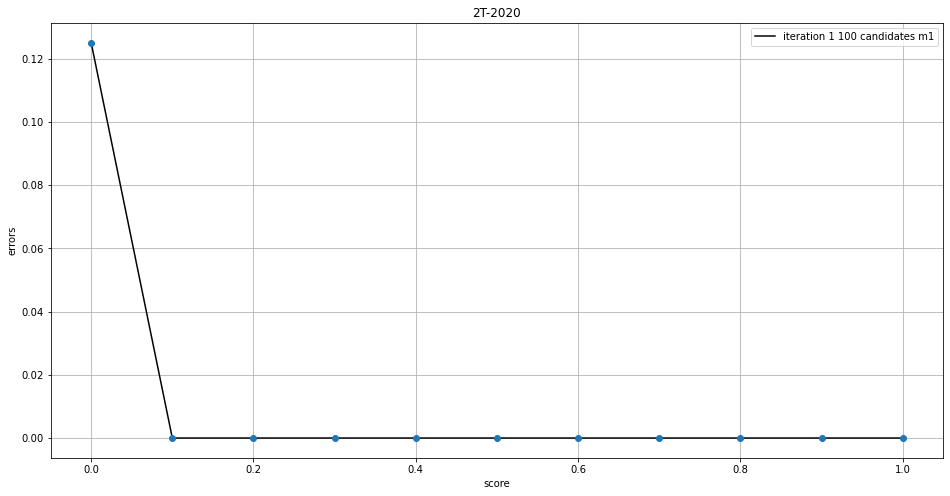

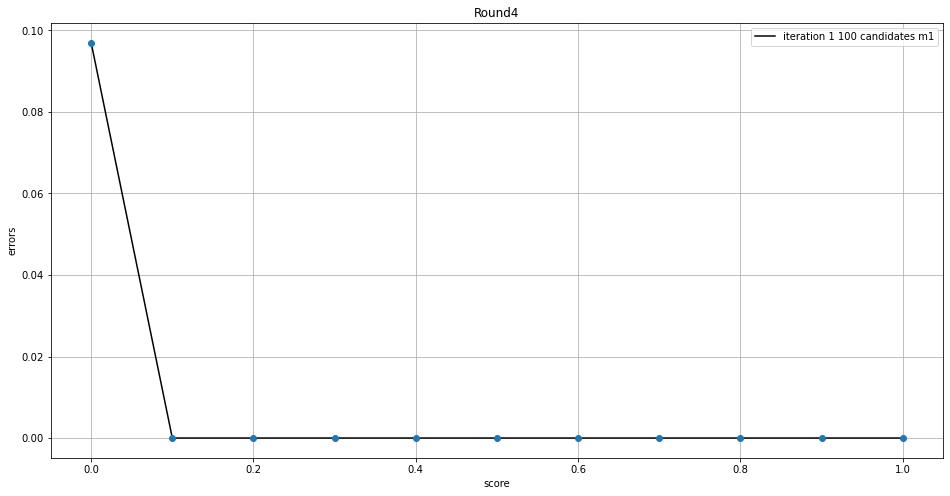

In [30]:
for d in dataset:
    datasets = [d]
    chart_data = []
    
    result = get_all_data_from_csv(datasets, 1, size="100_net1")
    (x, y) = get_x_y2(result)
    chart_data.append((f"iteration 1 100 candidates m1", x, y))   
    
    write_chart(chart_data, d)
    

100%|██████████| 11/11 [00:01<00:00,  9.10it/s]


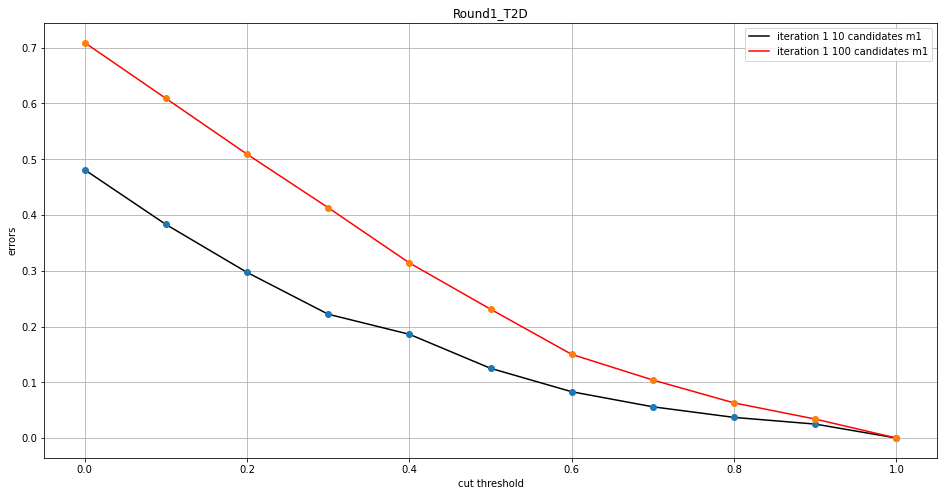

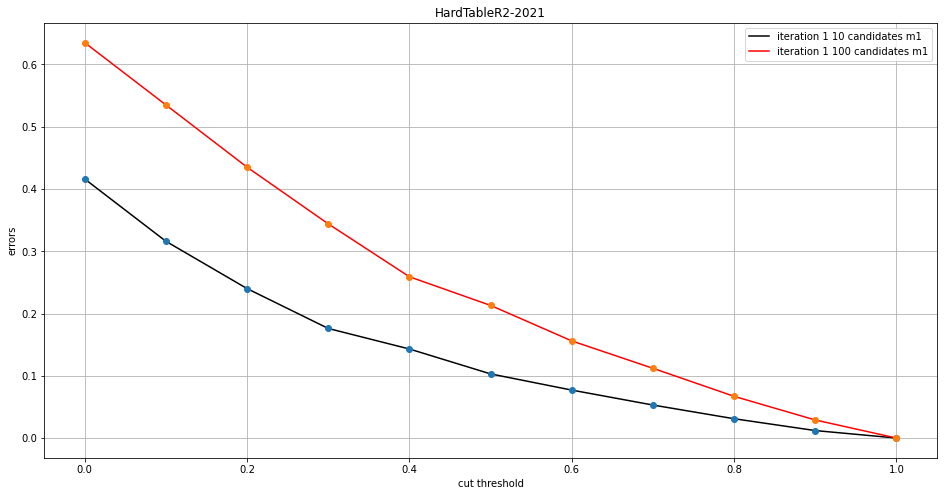

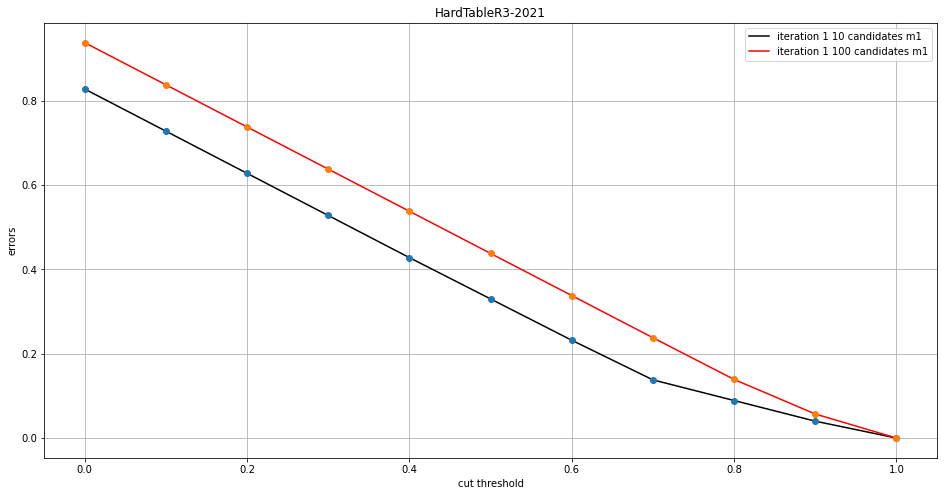

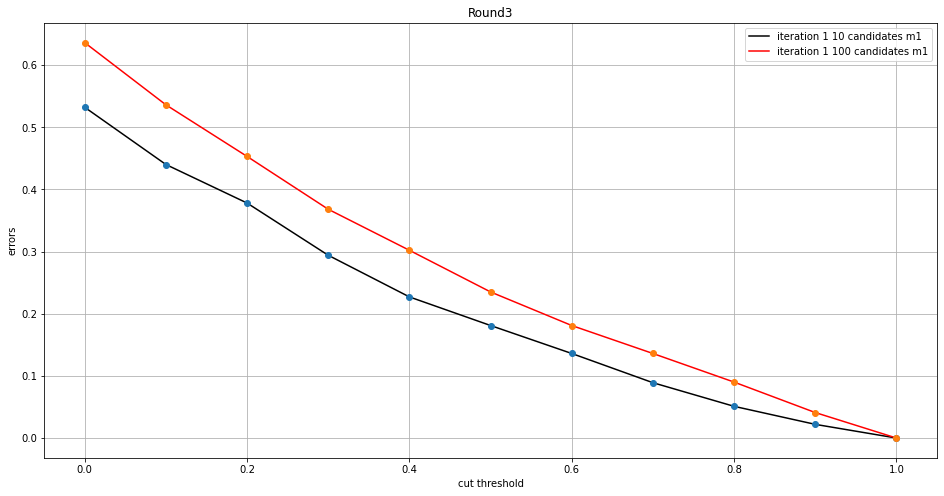

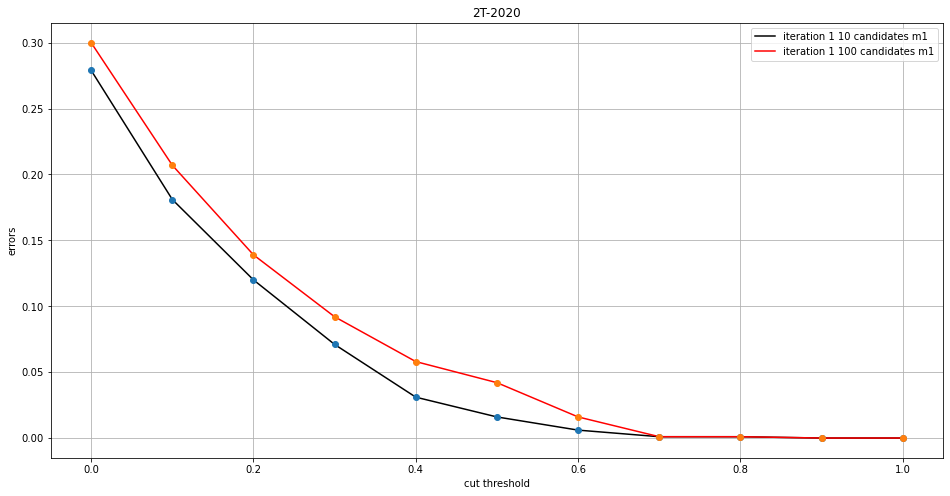

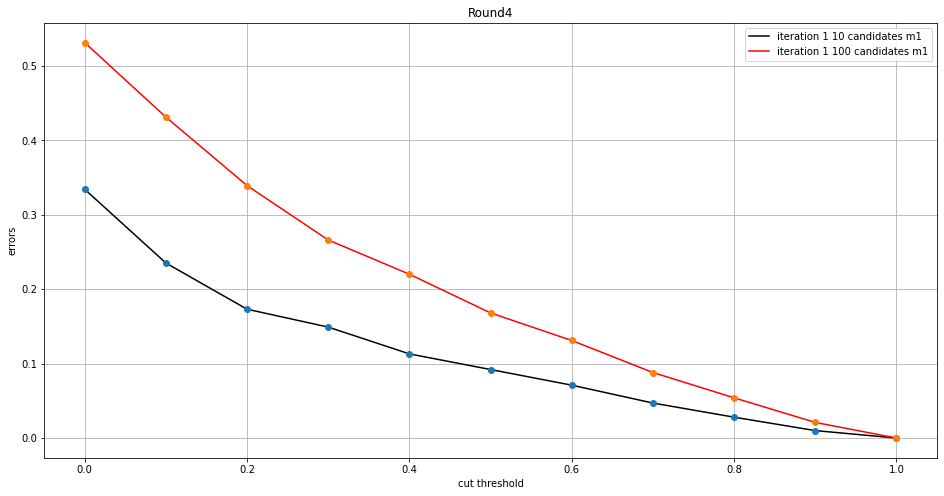

In [7]:
for d in dataset:
    datasets = [d]
    chart_data = []
    
    result = get_all_data_from_csv(datasets, 1, size="10_m1")
    (x, y) = get_x_y(result)
    chart_data.append((f"iteration 1 10 candidates m1", x, y))   
    
    result = get_all_data_from_csv(datasets, 1, size="100_m1")
    (x, y) = get_x_y(result)
    chart_data.append((f"iteration 1 100 candidates m1", x, y))   
    
    write_chart(chart_data, d)

100%|██████████| 11/11 [00:00<00:00, 16.87it/s]

KeyboardInterrupt



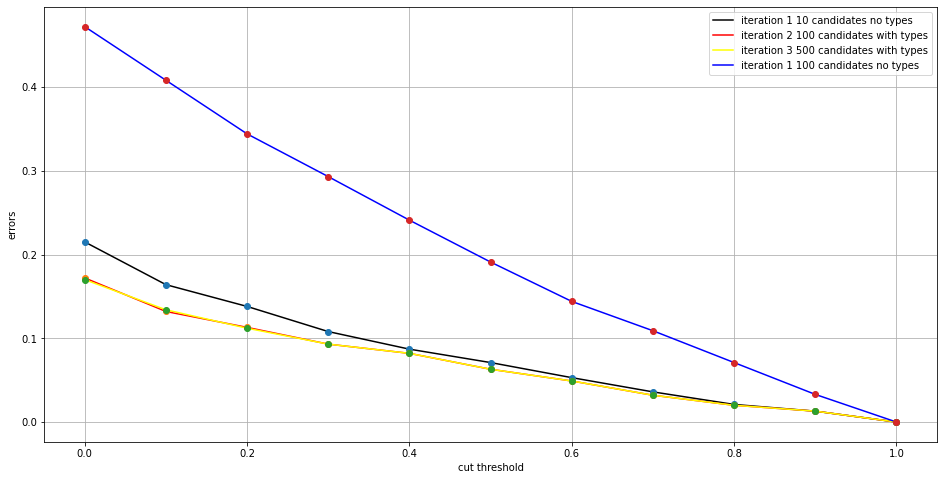

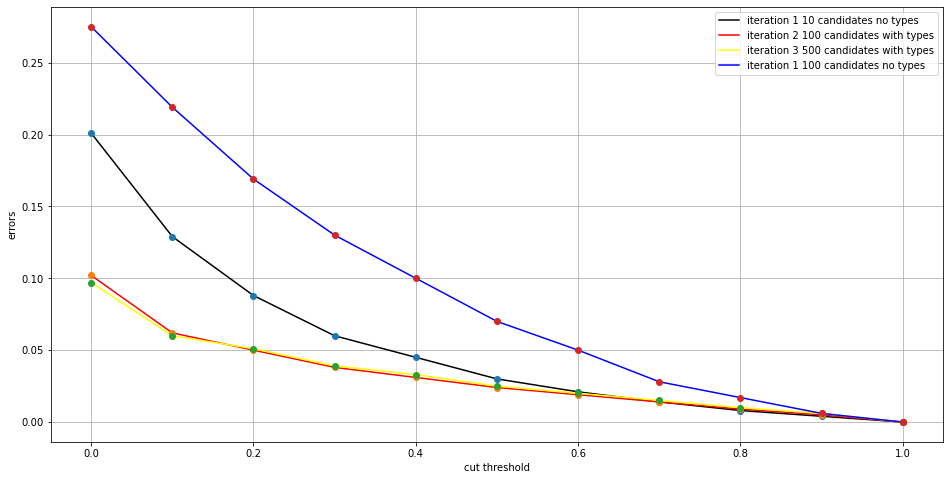

Error in callback <function flush_figures at 0x7f21cb6281f0> (for post_execute):



KeyboardInterrupt



In [93]:

for d in dataset:
    datasets = [d]
    chart_data = []
    labels = ["10 candidates no types", "100 candidates with types", "500 candidates with types"]
    for iteration in range(3):
        result = get_all_data_from_csv(datasets, iteration)
        (x, y) = get_x_y(result)
        chart_data.append((f"iteration {iteration+1} {labels[iteration]}", x, y))


    #result = get_all_data_from_csv(dataset, 1, size="10")
    #(x, y) = get_x_y(result)
    #chart_data.append((f"iteration 1 10 candidates", x, y))    
    result = get_all_data_from_csv(datasets, 1, size="100")
    (x, y) = get_x_y(result)
    chart_data.append((f"iteration 1 100 candidates no types", x, y))    
    write_chart(chart_data, d)

In [105]:
len(result)

1494375

In [ ]:
chart_data = []
for id_dataset in dataset:
    result = get_data_from_csv(id_dataset, 3)
    (x, y) = get_x_y(result)
    chart_data.append((id_dataset, x, y))

In [ ]:
chart_data = []
for i in range(3):
    id_dataset = "Round4"
    result = get_data_from_csv(id_dataset, i+1)
    (x, y) = get_x_y(result)
    chart_data.append((id_dataset, x, y))

In [90]:
chart_data = []
result = get_all_data_from_csv(dataset, 1, size="10")
(x, y) = get_x_y(result)
chart_data.append((f"iteration 1 100 candidates", x, y))    

100%|██████████| 11/11 [00:02<00:00,  4.67it/s]


In [79]:
chart_data = []
datasets = ["2T-2020"]
result1 = get_all_data_from_csv(datasets, 1)
(x1, y1) = get_x_y(result1)
chart_data.append((f"iteration 1 10 candidates", x1, y1))    
result2 = get_all_data_from_csv(datasets, 1, size="100")
(x2, y2) = get_x_y(result2)
chart_data.append((f"iteration 1 100 candidates", x2, y2))    

100%|██████████| 11/11 [00:00<00:00, 18.39it/s]


In [80]:
len(result1), len(result2)

(659944, 591507)

In [ ]:
result1

In [82]:
sum([1 for item in result1 if item["outcome"] == "WRONG"]), sum([1 for item in result2 if item["outcome"] == "WRONG"])

(62754, 206931)

In [88]:
key = "QW492LGU 2181 2" 
[item for item in result1 if item["key"] == key], [item for item in result2 if item["key"] == key]

([{'datset': '2T-2020',
   'key': 'QW492LGU 2181 2',
   'gt': "['q6607', 'q12891061', 'q9001433']",
   'id': 'q6607',
   'score': 7.725,
   'outcome': 'OK'}],
 [{'datset': '2T-2020',
   'key': 'QW492LGU 2181 2',
   'gt': "['q6607', 'q12891061', 'q9001433']",
   'id': 'q11399',
   'score': 11.502,
   'outcome': 'WRONG'}])

In [84]:
errors = set([item["key"] for item in result2 if item["outcome"] == "WRONG"])
buffer = []
for item in result1:
    if item["outcome"] == "OK" and item["key"] in errors:
        buffer.append((item["datset"], item["key"], item["id"]))

In [85]:
len(buffer)

168414

In [ ]:
buffer

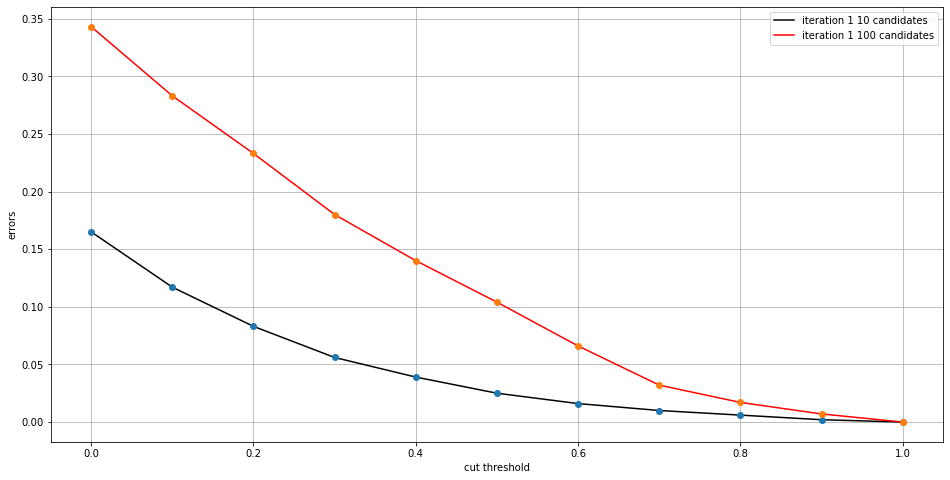

In [63]:
plt.figure(figsize=(16,8))
plt.xlabel('cut threshold')
plt.ylabel('errors')
color = ["black", "red", "yellow", "blue", "green", "gray"]
for i, (id_dataset, x, y) in enumerate(chart_data):
    plt.plot(x, y, label=id_dataset.split("_")[0], color=color[i]) 
    plt.errorbar(x, y, fmt ='o')
    #plt.savefig(f"figure/{id_dataset}")
plt.grid()    
plt.legend()
#plt.savefig("figure/all_test_100_size", bbox_inches='tight')

In [ ]:
id_dataset

In [ ]:
buffer = get_data_from_csv(["data/iterations/2T-2020_iteration_1.csv"])

In [ ]:
plot(buffer)

In [ ]:
df1 = pd.read_csv("./data/iterations/HardTableR2-2021_10.csv")
df2 = pd.read_csv("./data/iterations/HardTableR2-2021_100.csv")
len(df1), len(df2)

In [ ]:
df1

In [7]:
with open("result_with_type(only test).txt") as f:
    text = f.read()
lines = text.split("\n")

In [ ]:
out = []
buffer = ""
for line in lines:
    pass